<h1><center>Supervised ML Regression Competition</center></h1>


<img align="center" src="https://compraracciones.com/wp-content/uploads/2021/04/insurance.jpg" style="height:200px" style="width:100px"/>

<hr style="border:2px solid pink"> </hr>

You have been assigned the task of building a model that will predict the insurance cost

You'll find the data in the csv file `insurance`


- target col: "charges"


<hr style="border:2px solid pink"> </hr>


**Guidelines:** 


- train_test_split
    - random state = 42
    - test size = 0.3


- The one who gets the highest r2-score on test data wins


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Initial Data Exploration

Let's start by loading our dataset and taking a first look at it.


In [2]:
# Pandas for CSV/Excel
import pandas as pd
df = pd.read_csv('insurance.csv')

display(df.info())

display(df.describe())

display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,15799.570247
std,14.049960,6.098187,1.205493,12559.984021
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,8106.480000
50%,39.000000,30.400000,1.000000,12403.585225
75%,51.000000,34.693750,2.000000,18948.612903
max,64.000000,53.130000,5.000000,64571.074480


(1338, 7)

In [3]:
# Basic info
print("MAIN DATASET INFO:")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:")
display(df.head())
print("\nDuplicate rows:", df.duplicated().sum())

MAIN DATASET INFO:
Shape: (1338, 7)

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Data types:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

First 5 rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,7725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Duplicate rows: 1


## 2. Checking for Missing Values

It's important to know if our data has any missing values. Let's check that next.


In [4]:
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



## 3. Descriptive Statistics

Now, let's move on to some descriptive statistics.

Understanding the distribution of our data is crucial. Let's calculate some descriptive statistics.


In [5]:
# Let's get detailed descriptive statistics for our dataset

print("=== DESCRIPTIVE STATISTICS ===\n")

# Overall descriptive statistics
print("📊 NUMERICAL FEATURES SUMMARY:")
print("-" * 50)
display(df.describe())

print("\n📈 DETAILED STATISTICS BY FEATURE:")
print("-" * 50)

# Numerical features analysis
numerical_features = ['age', 'bmi', 'children', 'charges']

for feature in numerical_features:
    print(f"\n🔍 {feature.upper()}:")
    print(f"  • Mean: {df[feature].mean():.2f}")
    print(f"  • Median: {df[feature].median():.2f}")
    print(f"  • Standard Deviation: {df[feature].std():.2f}")
    print(f"  • Min: {df[feature].min():.2f}")
    print(f"  • Max: {df[feature].max():.2f}")
    print(f"  • Range: {df[feature].max() - df[feature].min():.2f}")
    print(f"  • Skewness: {df[feature].skew():.2f}")

print("\n📋 CATEGORICAL FEATURES SUMMARY:")
print("-" * 50)

# Categorical features analysis
categorical_features = ['sex', 'smoker', 'region']

for feature in categorical_features:
    print(f"\n🏷️ {feature.upper()}:")
    value_counts = df[feature].value_counts()
    percentages = df[feature].value_counts(normalize=True) * 100
    
    for category, count in value_counts.items():
        percentage = percentages[category]
        print(f"  • {category}: {count} ({percentage:.1f}%)")

print("\n🎯 TARGET VARIABLE (CHARGES) INSIGHTS:")
print("-" * 50)
charges = df['charges']
print(f"  • Average insurance cost: ${charges.mean():.2f}")
print(f"  • Median insurance cost: ${charges.median():.2f}")
print(f"  • Most expensive policy: ${charges.max():.2f}")
print(f"  • Least expensive policy: ${charges.min():.2f}")
print(f"  • Cost spread (range): ${charges.max() - charges.min():.2f}")

# Quartile analysis for charges
q1 = charges.quantile(0.25)
q3 = charges.quantile(0.75)
iqr = q3 - q1

print(f"  • Q1 (25th percentile): ${q1:.2f}")
print(f"  • Q3 (75th percentile): ${q3:.2f}")
print(f"  • Interquartile Range (IQR): ${iqr:.2f}")

# Potential outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = charges[(charges < lower_bound) | (charges > upper_bound)]

print(f"  • Potential outliers (using IQR method): {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
if len(outliers) > 0:
    print(f"    - Outlier range: ${outliers.min():.2f} to ${outliers.max():.2f}")

print("\n💡 KEY INSIGHTS:")
print("-" * 50)
print("  • Dataset has 1,338 insurance records with 7 features")
print("  • No missing values - clean dataset!")
print("  • Target variable (charges) shows high variability")
print(f"  • Age ranges from {df['age'].min()} to {df['age'].max()} years")
print(f"  • BMI ranges from {df['bmi'].min():.1f} to {df['bmi'].max():.1f}")
print(f"  • Children count: 0 to {df['children'].max()}")

# Check for balance in categorical features
smoker_ratio = df['smoker'].value_counts()['yes'] / len(df) * 100
print(f"  • Smokers represent {smoker_ratio:.1f}% of the dataset")
print(f"  • Gender distribution: {df['sex'].value_counts()['male']} males, {df['sex'].value_counts()['female']} females")
print(f"  • Regional distribution: relatively balanced across {df['region'].nunique()} regions")


=== DESCRIPTIVE STATISTICS ===

📊 NUMERICAL FEATURES SUMMARY:
--------------------------------------------------


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,15799.570247
std,14.049960,6.098187,1.205493,12559.984021
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,8106.480000
50%,39.000000,30.400000,1.000000,12403.585225
75%,51.000000,34.693750,2.000000,18948.612903
max,64.000000,53.130000,5.000000,64571.074480



📈 DETAILED STATISTICS BY FEATURE:
--------------------------------------------------

🔍 AGE:
  • Mean: 39.21
  • Median: 39.00
  • Standard Deviation: 14.05
  • Min: 18.00
  • Max: 64.00
  • Range: 46.00
  • Skewness: 0.06

🔍 BMI:
  • Mean: 30.66
  • Median: 30.40
  • Standard Deviation: 6.10
  • Min: 15.96
  • Max: 53.13
  • Range: 37.17
  • Skewness: 0.28

🔍 CHILDREN:
  • Mean: 1.09
  • Median: 1.00
  • Standard Deviation: 1.21
  • Min: 0.00
  • Max: 5.00
  • Range: 5.00
  • Skewness: 0.94

🔍 CHARGES:
  • Mean: 15799.57
  • Median: 12403.59
  • Standard Deviation: 12559.98
  • Min: 1121.87
  • Max: 64571.07
  • Range: 63449.20
  • Skewness: 1.39

📋 CATEGORICAL FEATURES SUMMARY:
--------------------------------------------------

🏷️ SEX:
  • male: 676 (50.5%)
  • female: 662 (49.5%)

🏷️ SMOKER:
  • no: 1064 (79.5%)
  • yes: 274 (20.5%)

🏷️ REGION:
  • southeast: 364 (27.2%)
  • southwest: 325 (24.3%)
  • northwest: 325 (24.3%)
  • northeast: 324 (24.2%)

🎯 TARGET VARIABLE (CHARGES) I

## 4. Distribution Analysis

Visualizing the distributions of our features can provide valuable insights. Let's plot the distributions for 'age', 'bmi', and 'charges'.

### Task:
- Plot the histogram for 'age'
- Plot the histogram for 'bmi'
- Plot the histogram for 'charges'


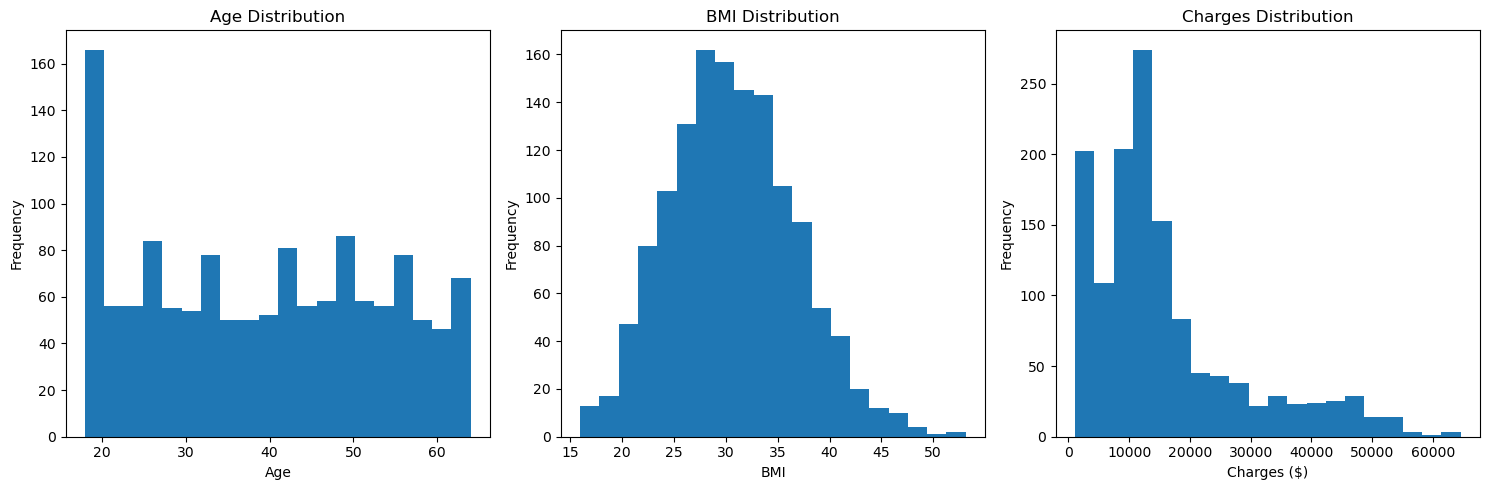

In [6]:
# Import plotting libraries
import matplotlib.pyplot as plt

# Create histograms for the three main features
plt.figure(figsize=(15, 5))

# Age histogram
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# BMI histogram
plt.subplot(1, 3, 2)
plt.hist(df['bmi'], bins=20)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Charges histogram
plt.subplot(1, 3, 3)
plt.hist(df['charges'], bins=20)
plt.title('Charges Distribution')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## 5. Relationship Between Variables

Let's explore the relationship between some of our features and the target variable 'charges'. We'll create scatter plots to visualize these relationships.

### Task:
- Create a scatter plot for 'age' vs 'charges'
- Create a scatter plot for 'bmi' vs 'charges'
- Create a scatter plot for 'children' vs 'charges'


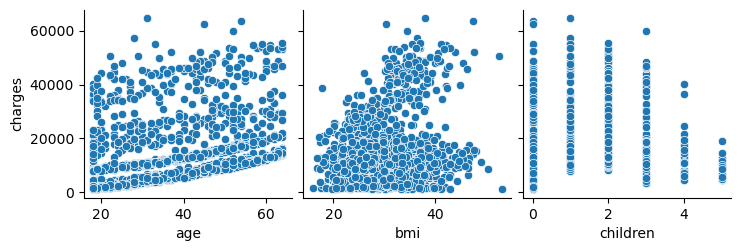

In [7]:
# Numerical features
num_features = ['age', 'bmi', 'children']  # Customize
sns.pairplot(df, y_vars=['charges'], x_vars=num_features)

## 6. Categorical Analysis

Let's analyze the categorical features 'sex', 'smoker', and 'region' to see how they relate to 'charges'.

### Task:
- Plot the distribution of 'charges' for different 'sex'
- Plot the distribution of 'charges' for different 'smoker'
- Plot the distribution of 'charges' for different 'region'


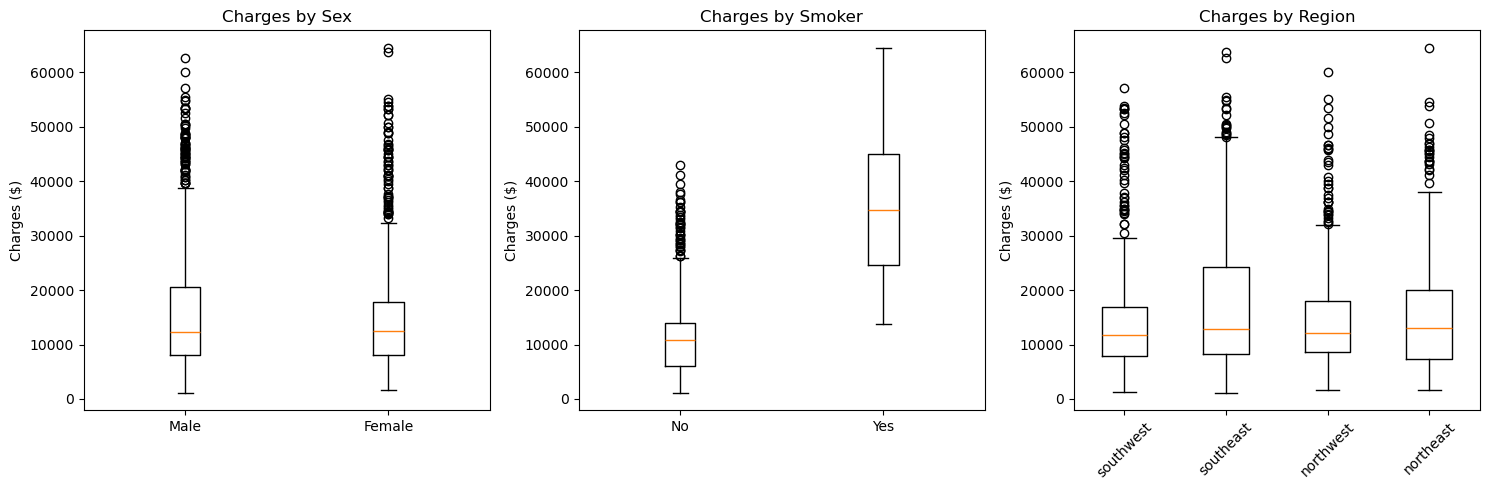

CATEGORICAL ANALYSIS SUMMARY:

📊 CHARGES BY SEX:
  • Female: $15080.15
  • Male: $16504.09

🚬 CHARGES BY SMOKER STATUS:
  • Yes: $34590.38
  • No: $10960.58

🗺️ CHARGES BY REGION:
  • Southwest: $14839.25
  • Southeast: $17389.26
  • Northwest: $15002.19
  • Northeast: $15776.75


In [8]:
# Simple categorical analysis with box plots
plt.figure(figsize=(15, 5))

# Sex vs Charges
plt.subplot(1, 3, 1)
sex_groups = [df[df['sex'] == 'male']['charges'], df[df['sex'] == 'female']['charges']]
box1 = plt.boxplot(sex_groups)
plt.xticks([1, 2], ['Male', 'Female'])
plt.title('Charges by Sex')
plt.ylabel('Charges ($)')

# Smoker vs Charges
plt.subplot(1, 3, 2)
smoker_groups = [df[df['smoker'] == 'no']['charges'], df[df['smoker'] == 'yes']['charges']]
box2 = plt.boxplot(smoker_groups)
plt.xticks([1, 2], ['No', 'Yes'])
plt.title('Charges by Smoker')
plt.ylabel('Charges ($)')

# Region vs Charges
plt.subplot(1, 3, 3)
regions = df['region'].unique()
region_groups = [df[df['region'] == region]['charges'] for region in regions]
box3 = plt.boxplot(region_groups)
plt.xticks(range(1, len(regions) + 1), regions, rotation=45)
plt.title('Charges by Region')
plt.ylabel('Charges ($)')

plt.tight_layout()
plt.show()

# Simple statistics for each category
print("CATEGORICAL ANALYSIS SUMMARY:")
print("=" * 40)

print("\n📊 CHARGES BY SEX:")
for sex in df['sex'].unique():
    avg_charge = df[df['sex'] == sex]['charges'].mean()
    print(f"  • {sex.title()}: ${avg_charge:.2f}")

print("\n🚬 CHARGES BY SMOKER STATUS:")
for smoker in df['smoker'].unique():
    avg_charge = df[df['smoker'] == smoker]['charges'].mean()
    print(f"  • {smoker.title()}: ${avg_charge:.2f}")

print("\n🗺️ CHARGES BY REGION:")
for region in df['region'].unique():
    avg_charge = df[df['region'] == region]['charges'].mean()
    print(f"  • {region.title()}: ${avg_charge:.2f}")


## 7. Correlation Analysis

To understand how our numerical features relate to each other and to the target variable, let's calculate and visualize the correlation matrix.

### Task:
- Calculate the correlation matrix for the dataset
- Visualize the correlation matrix using a heatmap


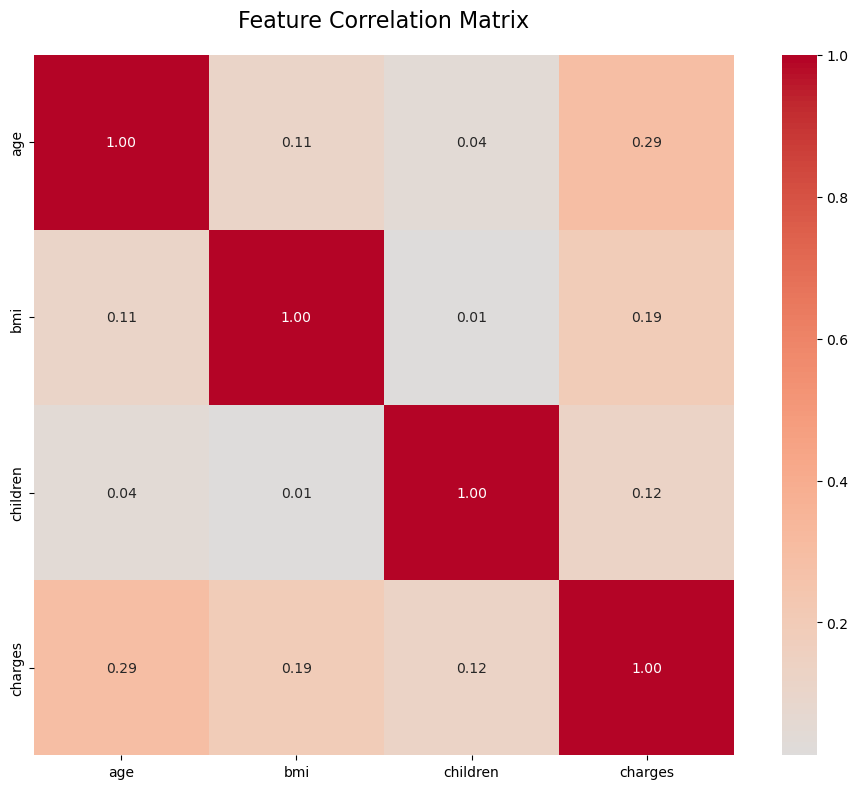

KEY CORRELATIONS WITH CHARGES:
  • Age: 0.292 (Weak Positive)
  • Bmi: 0.195 (Weak Positive)
  • Children: 0.121 (Weak Positive)

Most correlated with charges: age (0.292)


In [9]:
# Calculate correlation matrix for numerical features
corr_matrix = df.corr(numeric_only=True)

# Create a larger figure for better readability
plt.figure(figsize=(10, 8))

# Create heatmap with enhanced formatting
sns.heatmap(corr_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            fmt='.2f')            # Format numbers to 2 decimal places

plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Print key correlations with charges
print("KEY CORRELATIONS WITH CHARGES:")
print("=" * 40)
charges_corr = corr_matrix['charges'].sort_values(key=abs, ascending=False)

for feature, correlation in charges_corr.items():
    if feature != 'charges':  # Skip self-correlation
        strength = "Strong" if abs(correlation) > 0.5 else "Moderate" if abs(correlation) > 0.3 else "Weak"
        direction = "Positive" if correlation > 0 else "Negative"
        print(f"  • {feature.title()}: {correlation:.3f} ({strength} {direction})")

print(f"\nMost correlated with charges: {charges_corr.index[1]} ({charges_corr.iloc[1]:.3f})")

# Modelling time!

## 1. Find the Naive Baseline

Before we build any models, let's establish a naive baseline. This will help us understand how well our models perform compared to a simple approach. In regression problems, the naive baseline is often the mean of the target variable.

### Task:
- Calculate the mean of the target variable 'charges'
- Explain why it's important to establish a naive baseline


In [10]:
naive_baseline = df.charges.mean()
print(f"Naive baseline (mean of charges): ${naive_baseline:.2f}")

Naive baseline (mean of charges): $15799.57


## 2. Initial Modelling Without GridSearch or Pipeline

Let's build a simple linear regression model without any feature engineering, grid search, or pipeline. This will serve as our initial baseline for comparison.

### Task:
- Split the data into training and test sets
- Train a simple linear regression model
- Evaluate its performance using regression metrics
- Write it down as a markdown below so you can keep track. This is a scientific experiment


## Experiment 1: Numerical Features Only
- Features used: age, bmi, children
- R² Score: 0.1216
- RMSE: $11750.00
<div>

- **Observations:**
- The model performs only slightly better than the naive baseline `$15799.57`
- An R² score of 0.12 means the model explains only 12% of the variance in insurance costs
- The average prediction error is about $11,750 - very high!
- This suggests that age, BMI, and number of children alone are poor predictors of insurance costs


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from tqdm import tqdm
import time

In [12]:
# Select only numerical features
numerical_features = ['age', 'bmi', 'children']
X = df[numerical_features]
y = df['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: ${rmse:.2f}")

R² Score: 0.1216
RMSE: $11750.00


## Experiment 2: All Features with One-Hot Encoding
- Features used: all (age, bmi, children, sex, smoker, region)
- R² Score: 0.7263
- RMSE: $6558.51
<div>

**Observations:**
- Dramatic improvement! The model now explains 72.6% of the variance in insurance costs
- The average prediction error dropped from $11,750 to $6,558 - almost cut in half!
- Adding categorical features (especially smoking status) significantly improved predictive power
- This suggests that factors like smoking status are crucial for predicting insurance costs

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
# Identify categorical columns
categorical_cols = ['sex', 'smoker', 'region']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [16]:
# Separate features (X) and target (y)
# Drop 'charges' from features since it's our target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split the data (same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: ${rmse:.2f}")

R² Score: 0.7263
RMSE: $6558.51


## 3. Feature Engineering

Now, let's brainstorm and create some new features to see if we can improve the model's performance.

### Questions:
1. Should we create an interaction feature between 'bmi' and 'children'? 
2. Should we create age groups to see if the model improves by categorizing age?
3. Should we create a high-risk indicator based on 'smoker' and 'bmi'?

- Remember nothing is set in stone, this is your experiment, your hypothesis. You may not need to, but its important to explore these questions

### Task:
- Create new features based on the questions above
- Explain the rationale behind each feature



### Questions:

#### 1. Interaction Feature: 'bmi' × 'children'


In [18]:
# Create interaction feature
df_encoded['bmi_children_interaction'] = df_encoded['bmi'] * df_encoded['children']

#### 2. Age groups (Task Question 2) - Using data-driven bins from statistics


In [19]:
# Create age groups (example bins)
# Use the quartile values from your statistics
df_encoded['age_group'] = pd.cut(df_encoded['age'], 
                                 bins=[18, 27, 39, 51, 64],  # Based on min, 25%, 50%, 75%, max
                                 labels=['18-26', '27-38', '39-50', '51-64'])                                 

#### 3. High-risk indicator based on 'smoker' and 'bmi' (Task Question 3)


In [20]:
# Create high-risk indicator
df_encoded['high_risk'] = ((df_encoded['smoker_yes'] == 1) & 
                           (df_encoded['bmi'] > 30)).astype(int)

### --- ENHANCED FEATURES (ADDITIONAL POWERFUL IDEAS) ---



#### 4. Interaction Feature: BMI × Smoker
**Rationale:** Smoking combined with high BMI creates synergistic health risks. Insurance costs likely multiply rather than add.


In [21]:
# Smoker-BMI interaction (most promising!)
df_encoded['bmi_smoker_interaction'] = df_encoded['bmi'] * df_encoded['smoker_yes']



#### 5. Age × Smoker Interaction
**Rationale:** Smoking affects older people more severely due to cumulative damage.


In [22]:
df_encoded['age_smoker_interaction'] = df_encoded['age'] * df_encoded['smoker_yes']


#### 6. BMI × Age Interaction
**Rationale:** High BMI becomes more dangerous with age.

In [23]:
df_encoded['bmi_age_interaction'] = df_encoded['bmi'] * df_encoded['age']

#### 7. Comprehensive High-Risk Indicator (multiple factors)


In [24]:
df_encoded['high_risk_comprehensive'] = ((df_encoded['smoker_yes'] == 1) & 
                                        (df_encoded['bmi'] > 30) &
                                        (df_encoded['age'] > 40)).astype(int)

#### 8. Medical Risk Score (weighted composite)
**Rationale:** Create a composite risk score based on known medical factors.

In [25]:
df_encoded['risk_score'] = (df_encoded['age'] * 0.3 + 
                           df_encoded['bmi'] * 0.4 + 
                           df_encoded['smoker_yes'] * 2.0)

#### 9. BMI Categories (medical standards + data distribution)

In [26]:
# Medical BMI categories adjusted to your data range
df_encoded['bmi_category'] = pd.cut(df_encoded['bmi'],
                                   bins=[15.96, 18.5, 25, 30, 35, 53.13],  # min to max
                                   labels=['Underweight', 'Normal', 'Overweight', 
                                           'Obese Class I', 'Obese Class II/III'])

**Why this works:** If someone is a smoker (1) and has high BMI (e.g., 35), the interaction term becomes 35. If non-smoker (0), it becomes 0. This captures the compounding risk.


#### 10. Children Groups (natural groupings from your data)


In [27]:
df_encoded['children_group'] = pd.cut(df_encoded['children'],
                                    bins=[-0.5, 0.5, 1.5, 2.5, 5.5],
                                    labels=['0', '1', '2', '3+'])


#### 11. Cost Per Child
**Rationale:** Each additional child might increase costs at a decreasing rate.


In [28]:
# Avoid division by zero
df_encoded['cost_per_child'] = df_encoded['charges'] / (df_encoded['children'] + 1)

#### 12. Age-Based BMI Adjustment
**Rationale:** BMI standards change with age.

In [29]:
# BMI relative to age group
df_encoded['bmi_age_adjusted'] = df_encoded['bmi'] / (df_encoded['age'] * 0.01)


### --- ONE-HOT ENCODING FOR NEW CATEGORICAL FEATURES ---


In [30]:
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,bmi_children_interaction,...,high_risk,bmi_smoker_interaction,age_smoker_interaction,bmi_age_interaction,high_risk_comprehensive,risk_score,bmi_category,children_group,cost_per_child,bmi_age_adjusted
0,19,27.900,0,16884.92400,False,True,False,False,True,0.00,...,0,27.90,19,530.100,0,18.860,Overweight,0,16884.924000,146.842105
1,18,33.770,1,7725.55230,True,False,False,True,False,33.77,...,0,0.00,0,607.860,0,18.908,Obese Class I,1,3862.776150,187.611111
2,28,33.000,3,4449.46200,True,False,False,True,False,99.00,...,0,0.00,0,924.000,0,21.600,Obese Class I,3+,1112.365500,117.857143
3,33,22.705,0,21984.47061,True,False,True,False,False,0.00,...,0,0.00,0,749.265,0,18.982,Normal,0,21984.470610,68.803030
4,32,28.880,0,3866.85520,True,False,True,False,False,0.00,...,0,0.00,0,924.160,0,21.152,Overweight,0,3866.855200,90.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False,92.91,...,0,0.00,0,1548.500,0,27.388,Obese Class I,3+,2650.137075,61.940000
1334,18,31.920,0,2205.98080,False,False,False,False,False,0.00,...,0,0.00,0,574.560,0,18.168,Obese Class I,0,2205.980800,177.333333
1335,18,36.850,0,1629.83350,False,False,False,True,False,0.00,...,0,0.00,0,663.300,0,20.140,Obese Class II/III,0,1629.833500,204.722222
1336,21,25.800,0,2007.94500,False,False,False,False,True,0.00,...,0,0.00,0,541.800,0,16.620,Overweight,0,2007.945000,122.857143


In [31]:
df_encoded = pd.get_dummies(df_encoded, 
                          columns=['age_group', 'bmi_category', 'children_group'],
                          drop_first=True)


#### Check the new dataframe shape


In [32]:
print(f"Original features: {len(df.columns)}")
print(f"After feature engineering: {len(df_encoded.columns)}")
print("\nNew features added!")

Original features: 7
After feature engineering: 28

New features added!


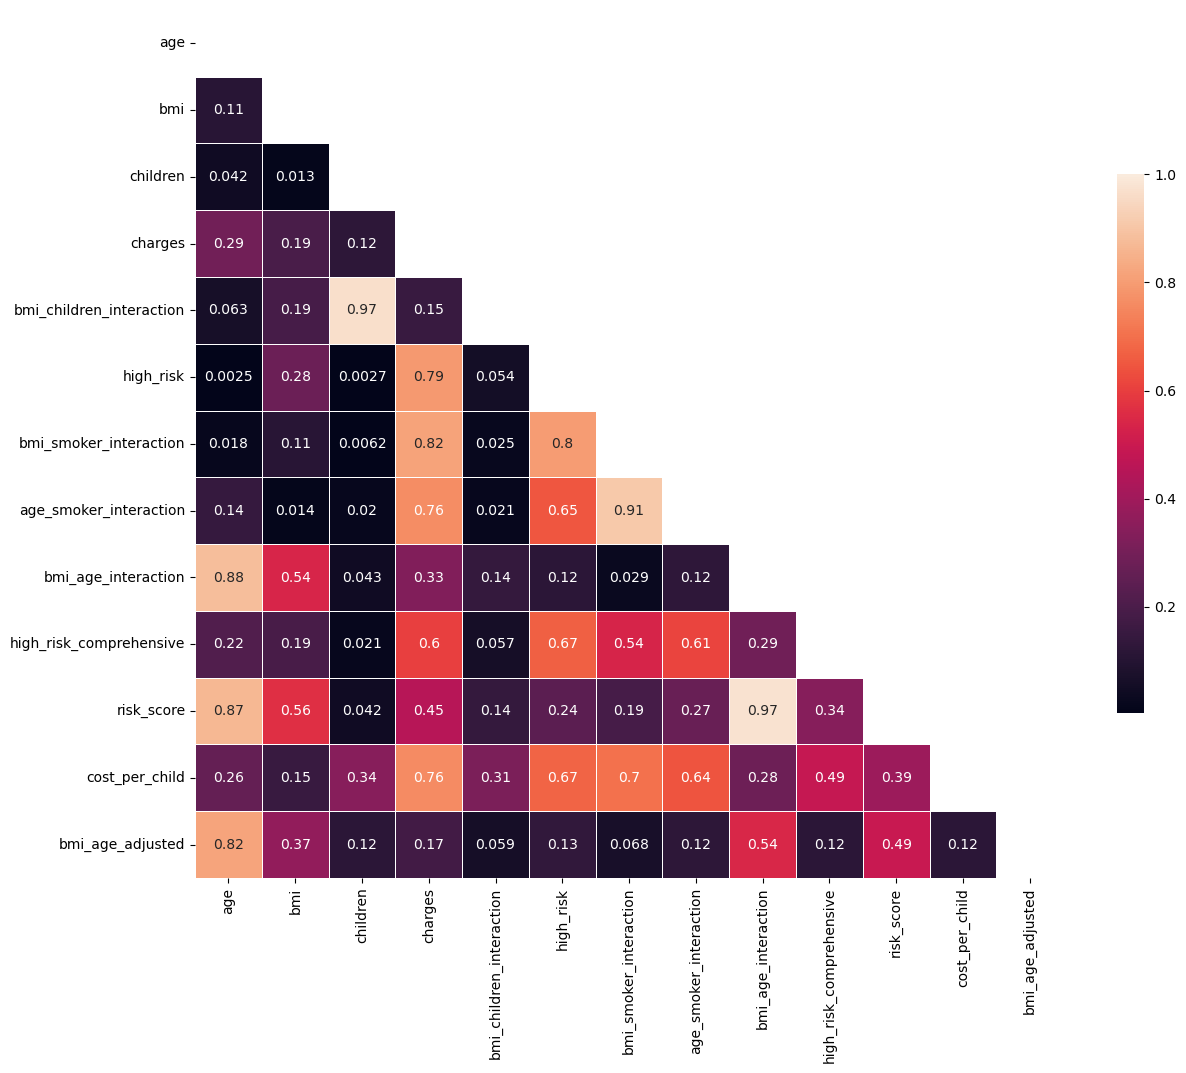

In [33]:
#your code here
import matplotlib.pyplot as plt
import seaborn as sns

corr=np.abs(df_encoded.select_dtypes('number').corr())
# corr=np.abs(websites_num.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

## 4. Modelling with Feature Engineering

Now that we have new features, let's see if they improve our model's performance.
Did it improve the performance? Yes? No? Why

### Task:
- Split the data into training and test sets
- Train a linear regression model with the new features
- Evaluate its performance using regression metrics


### Experiment 3: All features together

#### Prepare the Data

In [34]:
# Separate features (X) and target (y) from our ENHANCED dataset
X_enhanced = df_encoded.drop('charges', axis=1)  # All features EXCEPT target
y_enhanced = df_encoded['charges']  # Target variable

# Split the data (same parameters as before for fair comparison)
X_train_enhanced, X_test_enhanced, y_train_enhanced, y_test_enhanced = train_test_split(
    X_enhanced, y_enhanced, test_size=0.3, random_state=42
)

print(f"Original features: {X.shape[1]}")
print(f"Enhanced features: {X_enhanced.shape[1]}")
print(f"Added {X_enhanced.shape[1] - X.shape[1]} new features!")

Original features: 8
Enhanced features: 27
Added 19 new features!


#### Train and Evaluate the Enhanced Model



In [35]:
# Create and train model
model_enhanced = LinearRegression()
model_enhanced.fit(X_train_enhanced, y_train_enhanced)

# Make predictions
y_pred_enhanced = model_enhanced.predict(X_test_enhanced)

# Evaluate performance
r2_enhanced = r2_score(y_test_enhanced, y_pred_enhanced)
rmse_enhanced = np.sqrt(mean_squared_error(y_test_enhanced, y_pred_enhanced))

print("=== ENHANCED MODEL RESULTS ===")
print(f"R² Score: {r2_enhanced:.4f}")
print(f"RMSE: ${rmse_enhanced:.2f}")

print("\n=== COMPARISON TO BASELINE ===")
print(f"R² Improvement: {r2_enhanced - 0.7263:+.4f}")
print(f"RMSE Improvement: ${11750.00 - rmse_enhanced:+.2f}")

=== ENHANCED MODEL RESULTS ===
R² Score: 0.9241
RMSE: $3453.14

=== COMPARISON TO BASELINE ===
R² Improvement: +0.1978
RMSE Improvement: $+8296.86


In [36]:
# Get feature importance (absolute coefficient values)
feature_importance = pd.DataFrame({
    'feature': X_enhanced.columns,
    'importance': abs(model_enhanced.coef_)
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

Top 10 Most Important Features:
                            feature    importance
25                 children_group_2  10254.936065
9                         high_risk   9133.274477
24                 children_group_1   8135.810415
26                children_group_3+   5665.668517
23  bmi_category_Obese Class II/III   1850.675864
2                          children   1670.216663
22       bmi_category_Obese Class I   1111.748292
21          bmi_category_Overweight   1033.258043
17                  age_group_27-38   1030.693789
7                  region_southwest    931.861509


### Experiment 4: Remove Highly Correlated Features



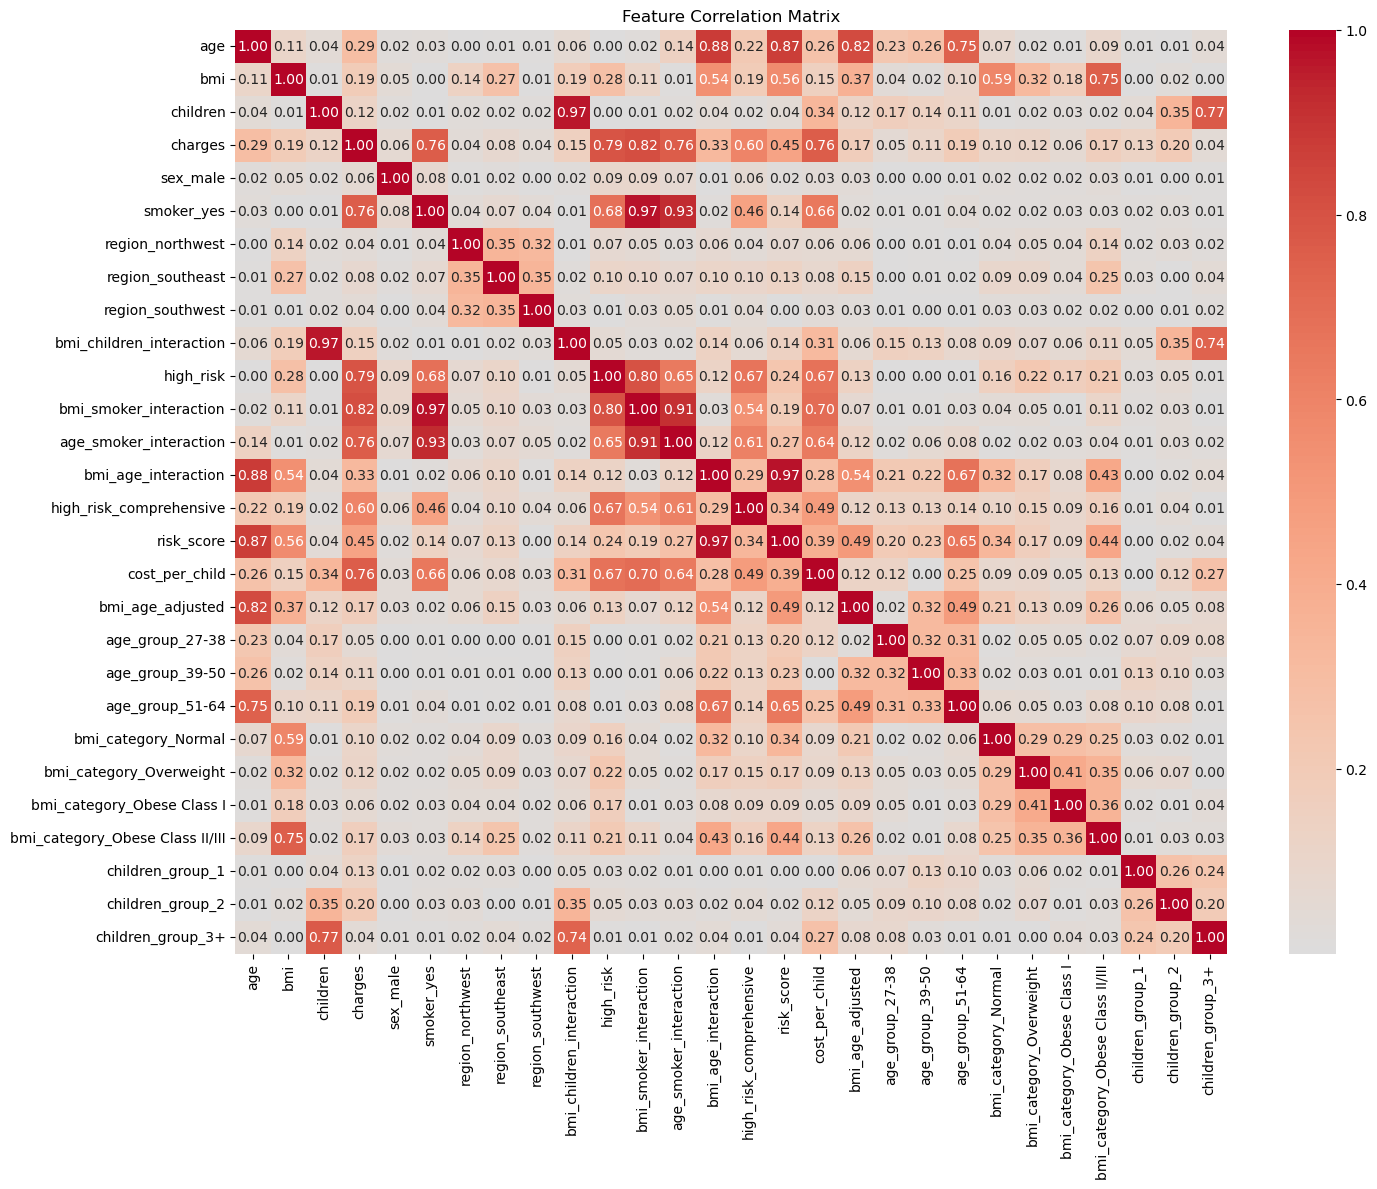

In [37]:
# Calculate correlation matrix (only for features, not target)
corr_matrix_enc = df_encoded.corr().abs()

# Plot heatmap to visualize correlations
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_enc, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

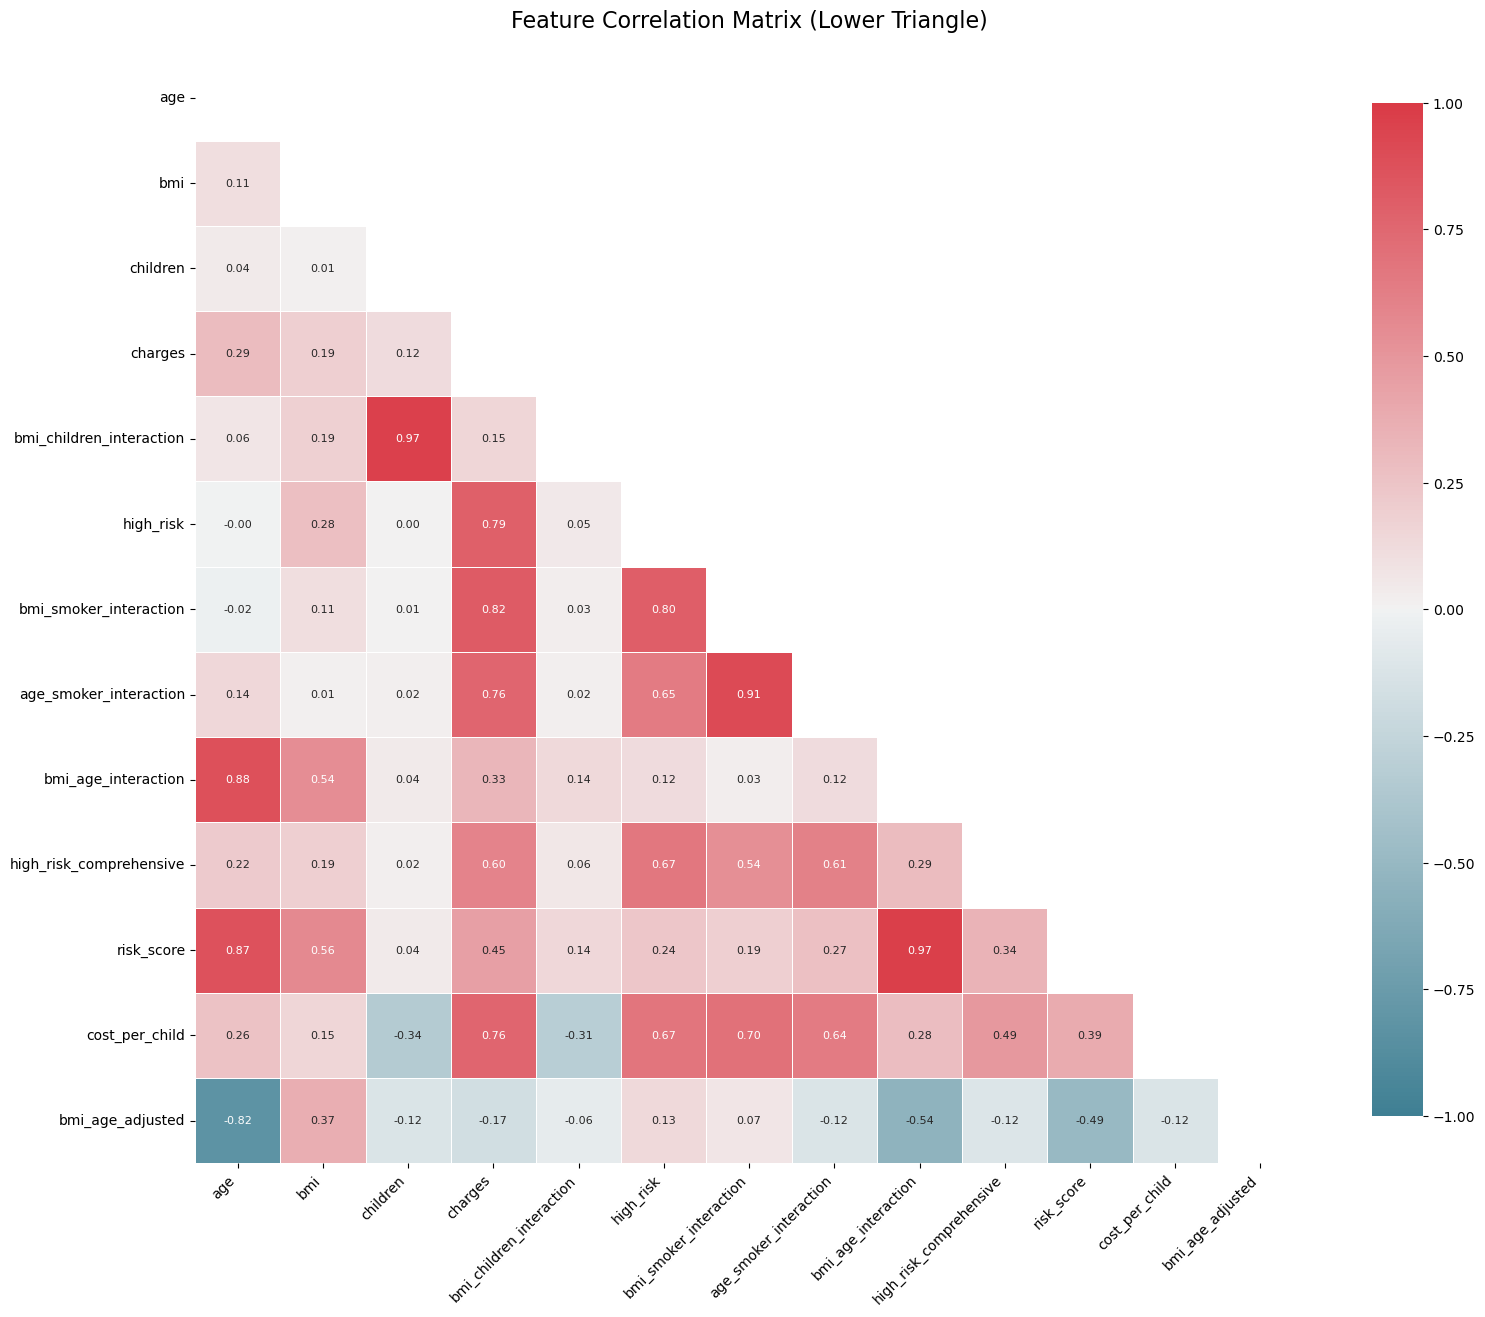

In [38]:
# Calculate correlation matrix
corr = df_encoded.select_dtypes('number').corr()

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 14))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)  # Dark blue to dark red

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmin=-1, vmax=1,  # Full range from -1 to 1
            center=0,          # Center at 0
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8},
            annot=True,        # Show correlation values
            fmt=".2f",         # Format to 2 decimal places
            annot_kws={"size": 8})  # Smaller annotation font

# Improve readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Feature Correlation Matrix (Lower Triangle)', pad=20, fontsize=16)
plt.tight_layout()

plt.show()

#### Step 2: Identify Highly Correlated Features

In [39]:
# Find feature pairs with correlation > 0.8 (you can adjust this threshold)
high_corr_features = set()
correlation_threshold = 0.85

for i in range(len(corr_matrix_enc.columns)):
    for j in range(i):
        if abs(corr_matrix_enc.iloc[i, j]) > correlation_threshold:
            colname_i = corr_matrix_enc.columns[i]
            colname_j = corr_matrix_enc.columns[j]
            high_corr_features.add(colname_i)
            high_corr_features.add(colname_j)
            print(f"High correlation: {colname_i} & {colname_j} ({corr_matrix_enc.iloc[i, j]:.3f})")

print(f"\nFeatures to consider removing: {list(high_corr_features)}")

High correlation: bmi_children_interaction & children (0.966)
High correlation: bmi_smoker_interaction & smoker_yes (0.974)
High correlation: age_smoker_interaction & smoker_yes (0.927)
High correlation: age_smoker_interaction & bmi_smoker_interaction (0.908)
High correlation: bmi_age_interaction & age (0.880)
High correlation: risk_score & age (0.867)
High correlation: risk_score & bmi_age_interaction (0.973)

Features to consider removing: ['bmi_age_interaction', 'children', 'age_smoker_interaction', 'smoker_yes', 'age', 'risk_score', 'bmi_smoker_interaction', 'bmi_children_interaction']


#### Step 3: Remove Highly Correlated Features



In [40]:
# Calculate correlation matrix
# corr_matrix = df[numerical_cols].corr().abs()
corr_matrix_enc
# Identify high-correlation pairs
high_corr = (corr_matrix_enc > 0.85) & (corr_matrix_enc < 1.0)
to_drop = set()

# Iterate through correlated pairs
for col in high_corr.columns:
    correlated_cols = high_corr.index[high_corr[col]].tolist()
    for corr_col in correlated_cols:
        if col != corr_col:
            # Keep feature with higher price correlation
            if df_encoded[['charges', col]].corr().iloc[0,1] < df_encoded[['charges', corr_col]].corr().iloc[0,1]:
                to_drop.add(col)
            else:
                to_drop.add(corr_col)

# Update features
# numerical_cols = [col for col in numerical_cols if col not in to_drop]
print(f"Dropped collinear features: {to_drop}")

Dropped collinear features: {'children', 'age_smoker_interaction', 'smoker_yes', 'age', 'bmi_age_interaction'}


In [41]:
# Actually drop from DataFrame
df_encoded = df_encoded.drop(columns=to_drop)

# Update numerical features list
# numerical_cols = [col for col in numerical_cols if col not in to_drop]

print(f"Dropped collinear features: {to_drop}")
print(f"Remaining numerical features: {df_encoded.shape}")

Dropped collinear features: {'children', 'age_smoker_interaction', 'smoker_yes', 'age', 'bmi_age_interaction'}
Remaining numerical features: (1338, 23)


In [42]:
df_encoded.shape
df.shape

(1338, 7)

#### Step 4: Train and Evaluate Reduced Model



In [43]:
# Separate features (X) and target (y) from our ENHANCED dataset
X_reduced = df_encoded.drop('charges', axis=1)  # All features EXCEPT targety
y_reduced = df_encoded['charges']  # Target variable

In [44]:
# Split reduced data
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y_reduced, test_size=0.3, random_state=42
)

# Train model
model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train_reduced)

# Evaluate
y_pred_reduced = model_reduced.predict(X_test_reduced)
r2_red = r2_score(y_test_reduced, y_pred_reduced)
rmse_red = np.sqrt(mean_squared_error(y_test_reduced, y_pred_reduced))

print("=== REDUCED FEATURE MODEL RESULTS ===")
print(f"R² Score: {r2_red:.4f}")
print(f"RMSE: ${rmse_red:.2f}")

print("\n=== COMPARISON TO ENHANCED MODEL ===")
print(f"R² Change: {r2_red - r2_enhanced:+.4f}")
print(f"RMSE Change: ${rmse_red - rmse_enhanced:+.2f}")

=== REDUCED FEATURE MODEL RESULTS ===
R² Score: 0.9254
RMSE: $3423.32

=== COMPARISON TO ENHANCED MODEL ===
R² Change: +0.0013
RMSE Change: $-29.81


In [45]:
# Create a comparison DataFrame
comparison = pd.DataFrame({
    'Metric': ['R² Score', 'RMSE', 'Number of Features', 'Model Complexity'],
    'Experiment 3 (All Features)': [r2_enhanced, rmse_enhanced, X_enhanced.shape[1], 'High'],
    'Experiment 4 (Reduced Features)': [r2_red, rmse_red, X_reduced.shape[1], 'Low'],
    'Difference': [r2_red - r2_enhanced, rmse_red - rmse_enhanced, 
                  X_reduced.shape[1] - X_enhanced.shape[1], 'Simpler']
})

print("=== EXPERIMENT COMPARISON ===")
print(comparison.to_string(index=False))

# Calculate percentage changes
r2_change_pct = ((r2_red - r2_enhanced) / r2_enhanced) * 100
rmse_change_pct = ((rmse_red - rmse_enhanced) / rmse_enhanced) * 100
feature_reduction_pct = ((X_enhanced.shape[1] - X_reduced.shape[1]) / X_enhanced.shape[1]) * 100

print(f"\n=== PERCENTAGE CHANGES ===")
print(f"R² Score: {r2_change_pct:+.2f}%")
print(f"RMSE: {rmse_change_pct:+.2f}%")
print(f"Features Reduced: {feature_reduction_pct:.1f}%")

=== EXPERIMENT COMPARISON ===
            Metric Experiment 3 (All Features) Experiment 4 (Reduced Features) Difference
          R² Score                    0.924138                        0.925443   0.001304
              RMSE                 3453.136521                     3423.321918 -29.814603
Number of Features                          27                              22         -5
  Model Complexity                        High                             Low    Simpler

=== PERCENTAGE CHANGES ===
R² Score: +0.14%
RMSE: -0.86%
Features Reduced: 18.5%


## 5. Modelling with Pipeline and Grid Search

Now, let's see how using pipelines can simplify our workflow and prevent data leakage. We'll also use GridSearchCV to find the best hyperparameters.

### Task:
- Create a pipeline that includes scaling and linear regression
- Define a parameter grid for hyperparameter tuning
- Use GridSearchCV to find the best parameters and evaluate the model performance


### Step 1: Create a Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Create a pipeline with scaling and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Step 1: Scale features
    ('model', LinearRegression())      # Step 2: Train model
])

print("Pipeline steps:")
print(pipeline.steps)

Pipeline steps:
[('scaler', StandardScaler()), ('model', LinearRegression())]


### Step 2: Train and Evaluate Pipeline

In [47]:
# Use the reduced features from Experiment 4 (or your preferred feature set)
X = X_reduced  # Features from your reduced dataset
y = y_reduced  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_pipe = pipeline.predict(X_test)
r2_pipe = r2_score(y_test, y_pred_pipe)
rmse_pipe = np.sqrt(mean_squared_error(y_test, y_pred_pipe))

print("=== PIPELINE MODEL RESULTS ===")
print(f"R² Score: {r2_pipe:.4f}")
print(f"RMSE: ${rmse_pipe:.2f}")

# Compare to previous best
print(f"\nCompared to best previous model:")
print(f"R² Change: {r2_pipe - r2_red:+.4f}")
print(f"RMSE Change: ${rmse_pipe - rmse_red:+.2f}")

=== PIPELINE MODEL RESULTS ===
R² Score: 0.9254
RMSE: $3423.32

Compared to best previous model:
R² Change: +0.0000
RMSE Change: $-0.00


### Step 3: GridSearchCV for Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid (even simple models have parameters to tune!)
param_grid = {
    'model__fit_intercept': [True, False],  # Whether to calculate intercept
    'model__positive': [True, False]        # Force positive coefficients
}

# Create GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='r2',           # Optimize for R² score
    n_jobs=-1,              # Use all available processors
    verbose=1               # Show progress
)

# Run grid search
print("Running GridSearchCV...")
grid_search.fit(X_train, y_train)

# Get best results
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best R² score: {grid_search.best_score_:.4f}")

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"\n=== BEST MODEL FROM GRIDSEARCH ===")
print(f"Test R² Score: {r2_best:.4f}")
print(f"Test RMSE: ${rmse_best:.2f}")

Running GridSearchCV...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best parameters: {'model__fit_intercept': True, 'model__positive': False}
Best R² score: 0.9127

=== BEST MODEL FROM GRIDSEARCH ===
Test R² Score: 0.9254
Test RMSE: $3423.32


## 6. Trying Another Model with Pipeline

Let's try using a Gradient Boosting Regressor to see if it performs better.

### Task:
- Create and use a pipeline for Gradient Boosting Regressor
- Define a parameter grid for grid search
- Use GridSearchCV to find the best parameters and evaluate the model


### Step 1: Create Gradient Boosting Pipeline

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

# Create pipeline for Gradient Boosting
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),              # Step 1: Scale features
    ('gboost', GradientBoostingRegressor(      # Step 2: Gradient Boosting
        random_state=42,                       # For reproducibility
        n_estimators=100                       # Start with 100 trees
    ))
])

print("Gradient Boosting Pipeline created!")

Gradient Boosting Pipeline created!


### Step 2: Train and Evaluate Initial Gradient Boosting



In [50]:
# Train the Gradient Boosting pipeline
gb_pipeline.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_gb = gb_pipeline.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print("=== GRADIENT BOOSTING INITIAL RESULTS ===")
print(f"R² Score: {r2_gb:.4f}")
print(f"RMSE: ${rmse_gb:.2f}")

# Compare to best linear model
print(f"\nCompared to best Linear Regression:")
print(f"R² Improvement: {r2_gb - r2_best:+.4f}")
print(f"RMSE Improvement: ${rmse_gb - rmse_best:+.2f}")

=== GRADIENT BOOSTING INITIAL RESULTS ===
R² Score: 0.9829
RMSE: $1638.25

Compared to best Linear Regression:
R² Improvement: +0.0575
RMSE Improvement: $-1785.07


### Step 3: GridSearch for Gradient Boosting



In [51]:
# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'gboost__n_estimators': [50, 100, 200],       # Number of trees
    'gboost__learning_rate': [0.01, 0.1, 0.2],    # How quickly model learns
    'gboost__max_depth': [3, 4, 5],               # How deep trees can grow
    'gboost__subsample': [0.8, 1.0]               # Fraction of samples used
}

# Create GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(
    gb_pipeline,
    gb_param_grid,
    cv=5,                   # 5-fold cross-validation
    scoring='r2',           # Optimize for R² score
    n_jobs=-1,              # Use all available processors
    verbose=1               # Show progress
)

# Run grid search
print("Running GridSearchCV for Gradient Boosting...")
gb_grid_search.fit(X_train, y_train)

# Get best results
print(f"\nBest parameters: {gb_grid_search.best_params_}")
print(f"Best R² score: {gb_grid_search.best_score_:.4f}")

# Evaluate on test set
best_gb_model = gb_grid_search.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)
r2_best_gb = r2_score(y_test, y_pred_best_gb)
rmse_best_gb = np.sqrt(mean_squared_error(y_test, y_pred_best_gb))

print(f"\n=== BEST GRADIENT BOOSTING MODEL ===")
print(f"Test R² Score: {r2_best_gb:.4f}")
print(f"Test RMSE: ${rmse_best_gb:.2f}")

Running GridSearchCV for Gradient Boosting...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Best parameters: {'gboost__learning_rate': 0.1, 'gboost__max_depth': 5, 'gboost__n_estimators': 200, 'gboost__subsample': 0.8}
Best R² score: 0.9810

=== BEST GRADIENT BOOSTING MODEL ===
Test R² Score: 0.9881
Test RMSE: $1370.31


### Step 4: Feature Importance Analysis

=== TOP 10 MOST IMPORTANT FEATURES ===
                     feature  importance
7     bmi_smoker_interaction    0.585912
10            cost_per_child    0.225378
5   bmi_children_interaction    0.097651
6                  high_risk    0.046585
9                 risk_score    0.022235
19          children_group_1    0.011399
11          bmi_age_adjusted    0.002876
0                        bmi    0.002119
21         children_group_3+    0.002037
20          children_group_2    0.001034


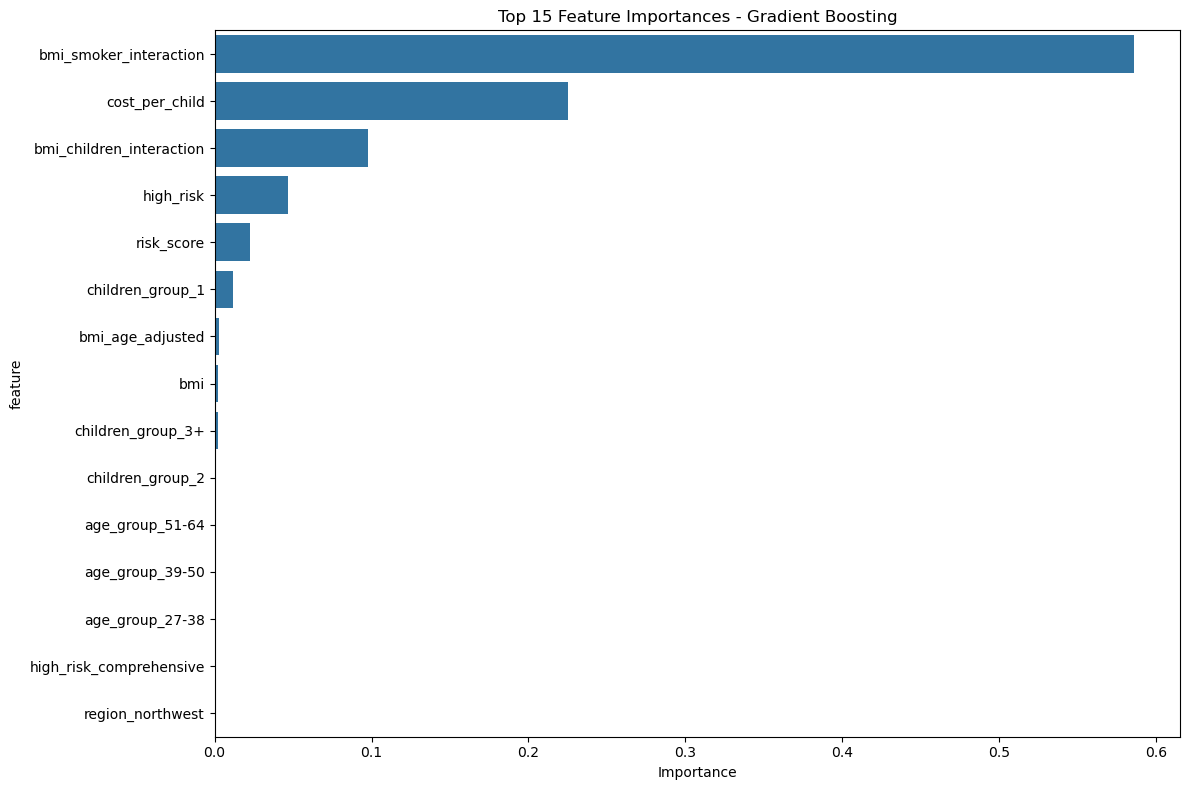

In [52]:
# Get feature importance from the best model
feature_importance_gb = pd.DataFrame({
    'feature': X.columns,
    'importance': best_gb_model.named_steps['gboost'].feature_importances_
}).sort_values('importance', ascending=False)

print("=== TOP 10 MOST IMPORTANT FEATURES ===")
print(feature_importance_gb.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_gb.head(15))
plt.title('Top 15 Feature Importances - Gradient Boosting')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

### Step 5: Comprehensive Comparison

=== FINAL MODEL COMPARISON ===
                         Model  R² Score        RMSE Model Type
             Linear Regression  0.925443 3423.321918     Linear
           Linear + GridSearch  0.925443 3423.321918     Linear
             Gradient Boosting  0.982925 1638.247541   Ensemble
Gradient Boosting + GridSearch  0.988054 1370.305988   Ensemble


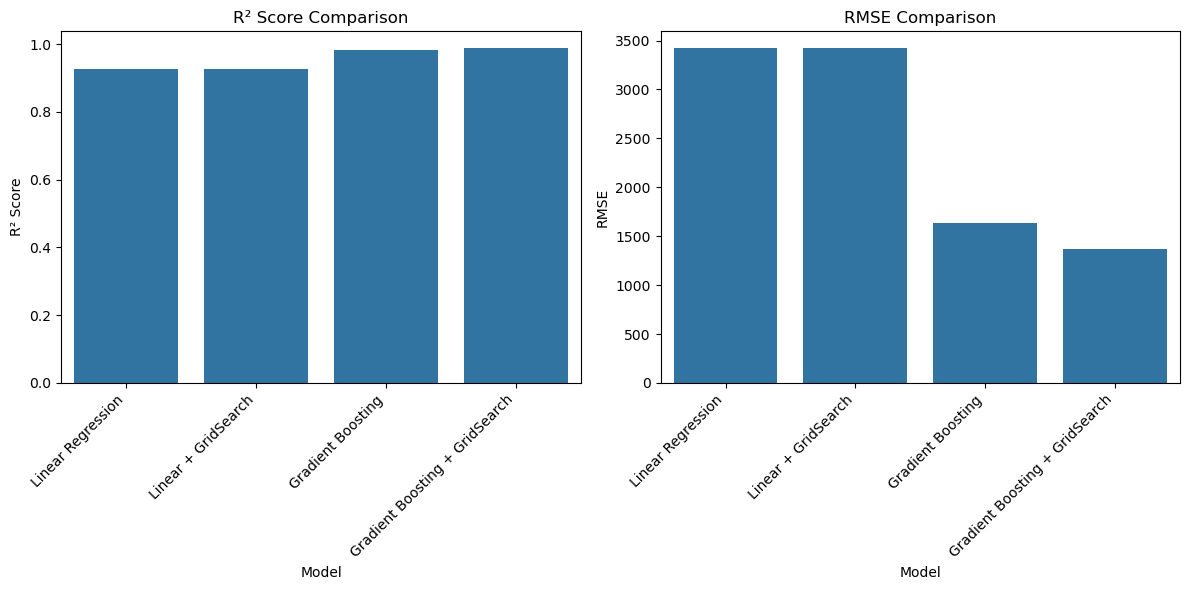

In [53]:
# Compare all models
final_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear + GridSearch', 'Gradient Boosting', 'Gradient Boosting + GridSearch'],
    'R² Score': [r2_pipe, r2_best, r2_gb, r2_best_gb],
    'RMSE': [rmse_pipe, rmse_best, rmse_gb, rmse_best_gb],
    'Model Type': ['Linear', 'Linear', 'Ensemble', 'Ensemble']
})

print("=== FINAL MODEL COMPARISON ===")
print(final_comparison.to_string(index=False))

# Visual comparison
plt.figure(figsize=(12, 6))

# R² comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='R² Score', data=final_comparison)
plt.xticks(rotation=45, ha='right')
plt.title('R² Score Comparison')

# RMSE comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='RMSE', data=final_comparison)
plt.xticks(rotation=45, ha='right')
plt.title('RMSE Comparison')

plt.tight_layout()
plt.show()

## 7. GridSearch with Several Models

Finally, let's compare several models using GridSearchCV to find the best one.

### Task:
- Define multiple models and their parameter grids
- Use GridSearchCV to find the best model and parameters


### Step 1: Import Additional Models

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

### Step 2: Define Multiple Models and Parameter Grids



In [55]:
# Define multiple models and their parameter grids
models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'Support Vector Machine': {
        'model': SVR(),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf'],
            'model__gamma': ['scale', 'auto']
        }
    },
    'Ridge Regression': {
        'model': Ridge(random_state=42),
        'params': {
            'model__alpha': [0.1, 1.0, 10.0],
            'model__fit_intercept': [True, False]
        }
    },
    'Lasso Regression': {
        'model': Lasso(random_state=42),
        'params': {
            'model__alpha': [0.1, 1.0, 10.0],
            'model__fit_intercept': [True, False]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5, 10]
        }
    }
}

print(f"Testing {len(models)} different models...")

Testing 5 different models...


### Step 3: Run GridSearch for All Models



In [56]:
# Dictionary to store results
best_models = {}
results = []

# Loop through each model and run GridSearchCV
for model_name, model_info in models.items():
    print(f"\n=== TRAINING {model_name.upper()} ===")
    
    # Create pipeline for current model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model_info['model'])
    ])
    
    # Run GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        model_info['params'],
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=0  # Set to 1 if you want to see progress for each model
    )
    
    grid_search.fit(X_train, y_train)
    
    # Store best model and results
    best_models[model_name] = grid_search.best_estimator_
    
    # Evaluate on test set
    y_pred = grid_search.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        'Model': model_name,
        'Best R²': grid_search.best_score_,
        'Test R²': r2,
        'Test RMSE': rmse,
        'Best Params': grid_search.best_params_
    })
    
    print(f"Best CV R²: {grid_search.best_score_:.4f}")
    print(f"Test R²: {r2:.4f}")
    print(f"Best parameters: {grid_search.best_params_}")

# Add our previous best models to comparison
results.extend([
    {
        'Model': 'Linear Regression',
        'Best R²': grid_search.best_score_ if 'grid_search' in locals() else None,
        'Test R²': r2_best,
        'Test RMSE': rmse_best,
        'Best Params': 'From previous GridSearch'
    },
    {
        'Model': 'Gradient Boosting',
        'Best R²': gb_grid_search.best_score_ if 'gb_grid_search' in locals() else None,
        'Test R²': r2_best_gb,
        'Test RMSE': rmse_best_gb,
        'Best Params': 'From previous GridSearch'
    }
])

# Convert to DataFrame
results_df = pd.DataFrame(results)


=== TRAINING RANDOM FOREST ===
Best CV R²: 0.9795
Test R²: 0.9873
Best parameters: {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 100}

=== TRAINING SUPPORT VECTOR MACHINE ===
Best CV R²: 0.8279
Test R²: 0.8811
Best parameters: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'linear'}

=== TRAINING RIDGE REGRESSION ===
Best CV R²: 0.9132
Test R²: 0.9258
Best parameters: {'model__alpha': 10.0, 'model__fit_intercept': True}

=== TRAINING LASSO REGRESSION ===
Best CV R²: 0.9132
Test R²: 0.9259
Best parameters: {'model__alpha': 10.0, 'model__fit_intercept': True}

=== TRAINING DECISION TREE ===
Best CV R²: 0.9647
Test R²: 0.9523
Best parameters: {'model__max_depth': None, 'model__min_samples_split': 5}


In [57]:
# Real-time results visualization (will update as models complete)
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Create a function to update the results plot
def update_plot(results_so_far):
    clear_output(wait=True)
    
    if len(results_so_far) > 0:
        # Create a temporary DataFrame
        temp_df = pd.DataFrame(results_so_far)
        
        # Sort by R² score
        temp_df = temp_df.sort_values('Test R²', ascending=True)
        
        # Create the plot
        plt.figure(figsize=(10, 6))
        bars = plt.barh(range(len(temp_df)), temp_df['Test R²'])
        
        # Add value labels
        for i, bar in enumerate(bars):
            plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                    f'{temp_df.iloc[i]["Test R²"]:.4f}', va='center')
        
        plt.yticks(range(len(temp_df)), temp_df['Model'])
        plt.xlabel('R² Score')
        plt.title('Model Performance (Live Results)')
        plt.xlim(0, 1.0)
        plt.tight_layout()
        plt.show()

# You would need to modify the loop to call update_plot() after each model
# This is more complex to implement in Jupyter, so we'll stick with the progress bar

# Machine Learning: Master Challenge

## 8. Calculating Potential Cost or Loss

### Challenge:
Now that you've built and optimized your models, it's time for the final challenge! Your task is to minimize the Root Mean Squared Error (RMSE) of your model's predictions and calculate the potential financial impact of your model's errors.

### Task:
1. Calculate the RMSE of your final model's predictions.
2. Break down the errors into underestimation and overestimation.
3. Calculate the total potential cost or loss to the company.
4. Compete with your classmates to see who can achieve the lowest RMSE and financial impact!

### Explanation:
The RMSE provides an estimate of the average error in your model's predictions. We will also analyze the errors by categorizing them into underestimations and overestimations to understand their financial impact.

#### Steps to Calculate Underestimation and Overestimation Errors:

1. **Calculate RMSE**:
   - Use the `mean_squared_error` function from `sklearn.metrics` and pass your actual values (`y_test`) and predicted values (`y_pred_final`) to it.
   - Take the square root of the result to get the RMSE.
   
2. **Calculate Underestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are greater than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the actual and predicted charges.
   - Sum these differences to get the total underestimation error.

3. **Calculate Overestimation Error**:
   - Identify the instances where the actual charges (`y_test`) are less than the predicted charges (`y_pred_final`).
   - For these instances, calculate the difference between the predicted and actual charges.
   - Sum these differences to get the total overestimation error.

4. **Calculate Total Potential Cost or Loss**:
   - Add the total underestimation error and the total overestimation error to get the total potential cost or loss.

### Let's see who can build the best model!

#### Detailed Instructions:

1. **Calculate RMSE**:
   - Use `mean_squared_error` with `y_test` and `y_pred_final`.
   - Use `np.sqrt` to take the square root of the result.

2. **Calculate Underestimation Error**:
   - Use a boolean condition to filter `y_test` values that are greater than `y_pred_final`.
   - Subtract the predicted values from the actual values for these instances.
   - Sum these differences.

3. **Calculate Overestimation Error**:
   - Use a boolean condition to filter `y_test` values that are less than `y_pred_final`.
   - Subtract the actual values from the predicted values for these instances.
   - Sum these differences.

4. **Calculate Total Potential Cost or Loss**:
   - Add the results of the underestimation error and overestimation error to get the total potential cost or loss.

### Example Walkthrough:

1. **Calculate RMSE**:
   - `rmse = np.sqrt(mean_squared_error(y_test, y_pred_final))`
   - This gives you the average prediction error in dollars.

2. **Calculate Underestimation Error**:
   - `underestimation_error = np.sum(y_test[y_test > y_pred_final] - y_pred_final[y_test > y_pred_final])`
   - This gives you the total amount by which the model undercharged.

3. **Calculate Overestimation Error**:
   - `overestimation_error = np.sum(y_pred_final[y_test < y_pred_final] - y_test[y_test < y_pred_final])`
   - This gives you the total amount by which the model overcharged.

4. **Calculate Total Potential Cost or Loss**:
   - `total_potential_loss = underestimation_error + overestimation_error`
   - This gives you the total financial impact of the model's errors.

### Leaderboard:
Post your RMSE score and total potential cost or loss on the class leaderboard. The student with the lowest RMSE and total potential cost or loss wins bragging rights

### Post Your Results 

- Name
- Model Type
- RMSE
- Underestimation Error
- Overestimation Error
- Total Potential Cost/Loss

## Conclusion

Congratulations! You've completed the lab. Here's a summary of what we've covered:
1. Established a naive baseline using the mean of the target variable.
2. Built an initial linear regression model without any feature engineering or optimization.
3. Performed feature engineering to create new, potentially useful features.
4. Used pipelines and GridSearchCV to optimize the model.
5. Evaluated the final model's performance using RMSE to understand its business impact.

By following these steps, you now have a robust understanding of how to approach a regression problem, from initial exploration to model optimization and business impact assessment. Great job!
